### Load Dataset

In [1]:
!mkdir data
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv -O data/winequality-red.csv

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np

In [3]:
data_path = Path('data/winequality-red.csv')

# load the csv
df = pd.read_csv(data_path, sep=';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
print("Number of records: ", len(df))
print("Number of columns: ", len(df.columns))
print("Columns:\n", df.columns)

Number of records:  1599
Number of columns:  12
Columns:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### EDA

Perform EDA on dataset

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

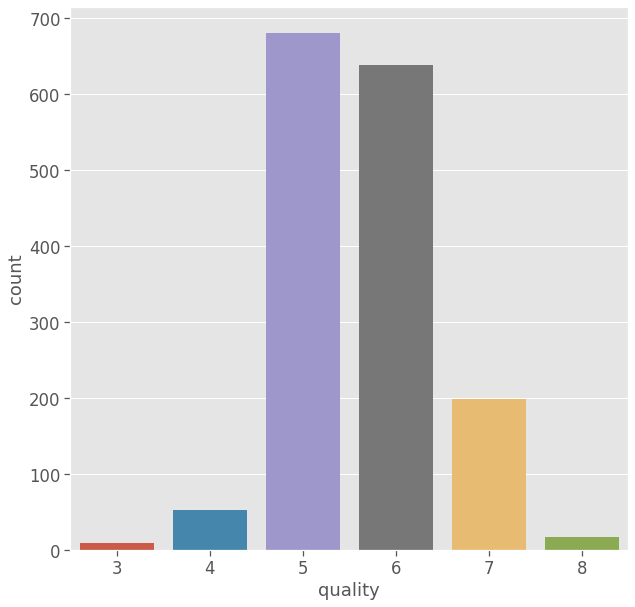

In [9]:
sns.countplot(x='quality', data=df)

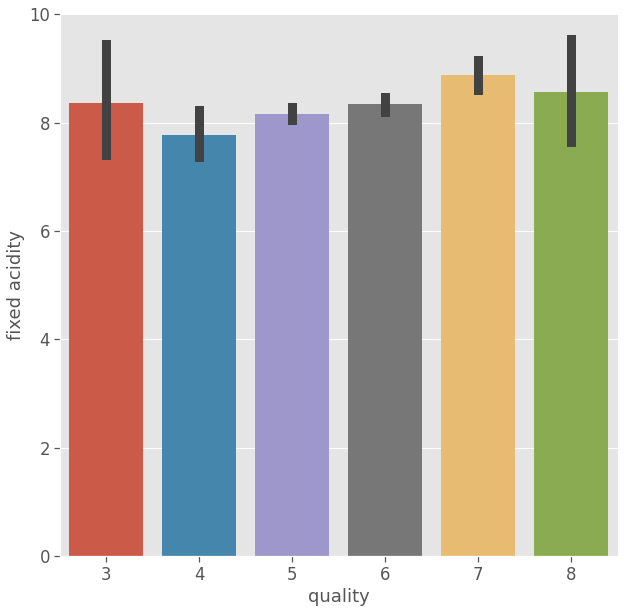

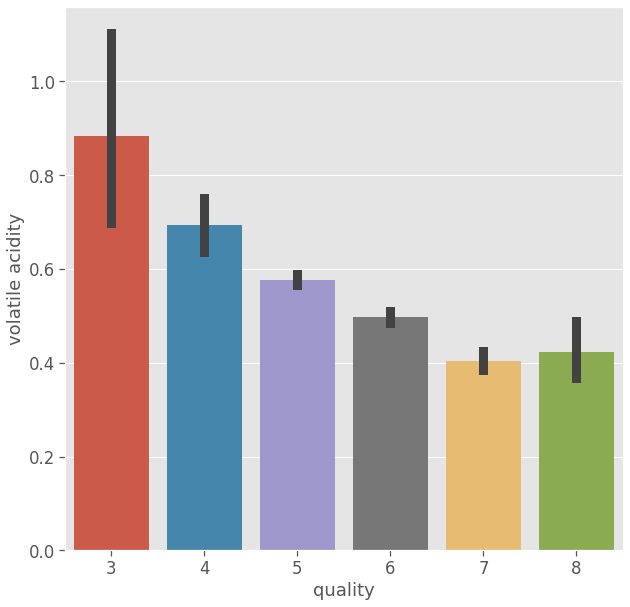

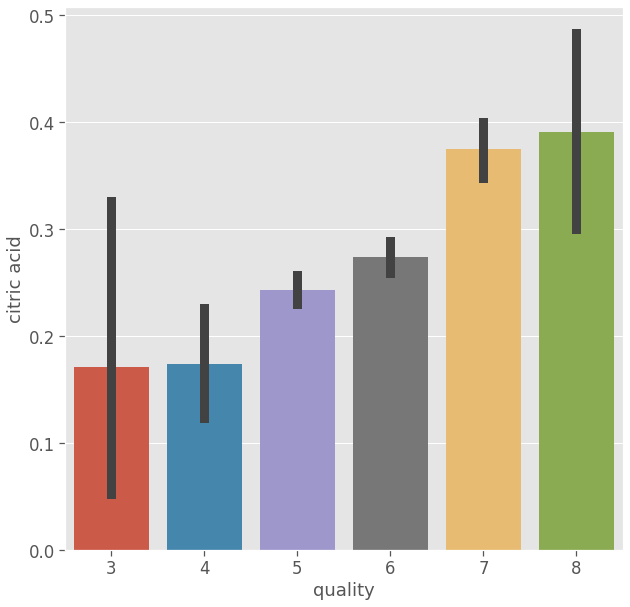

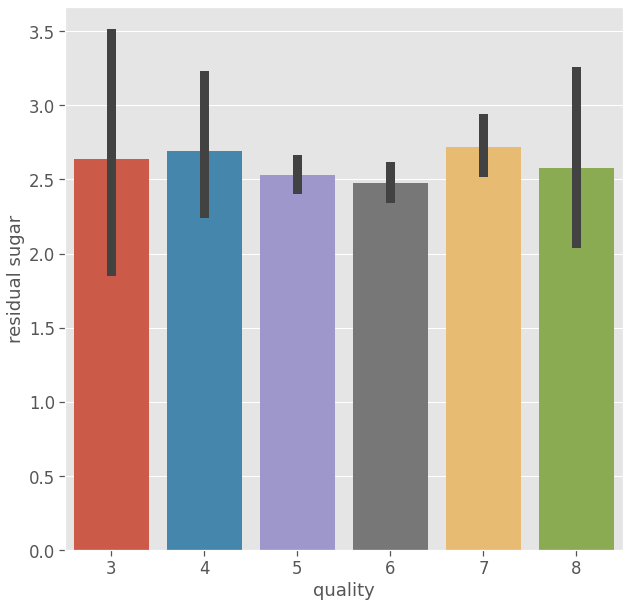

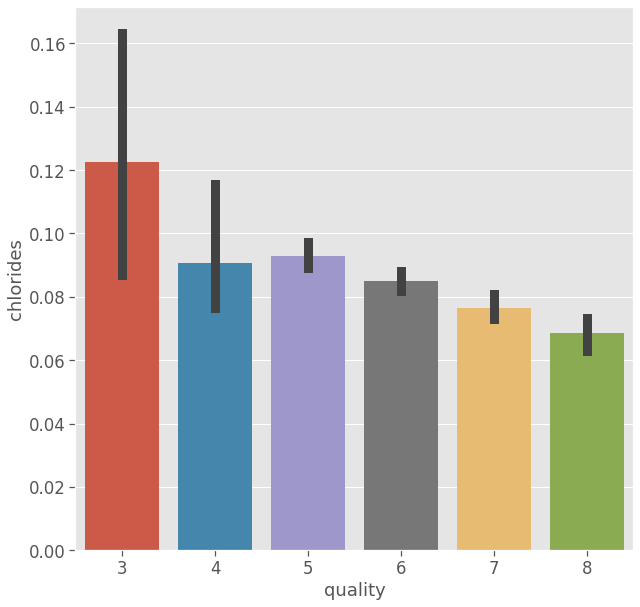

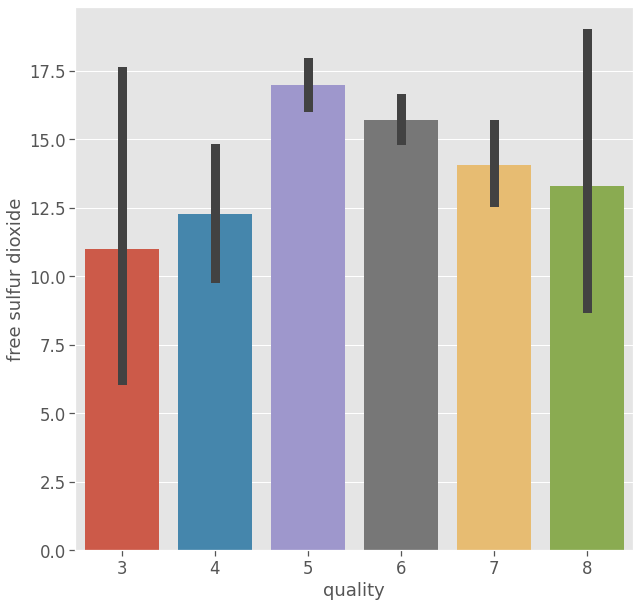

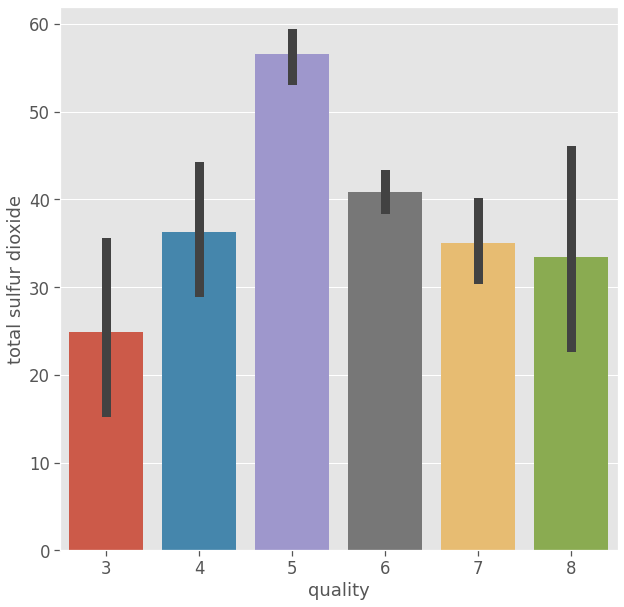

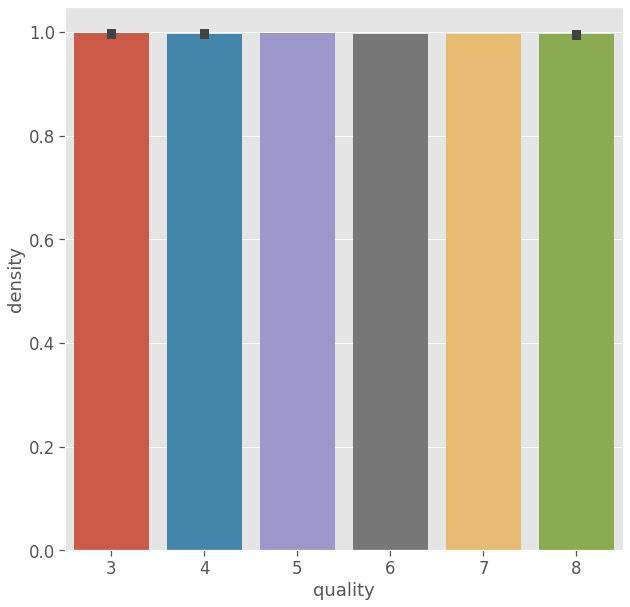

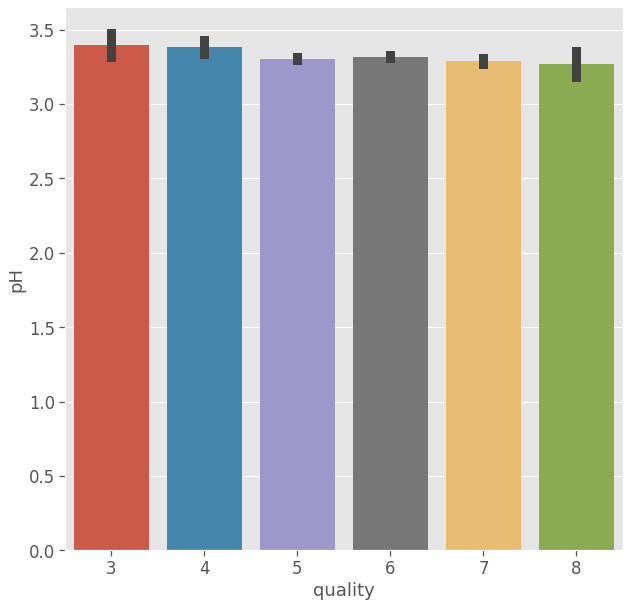

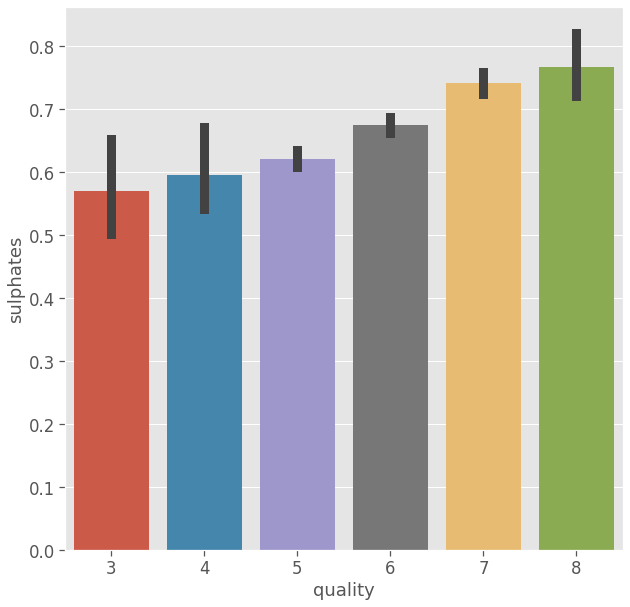

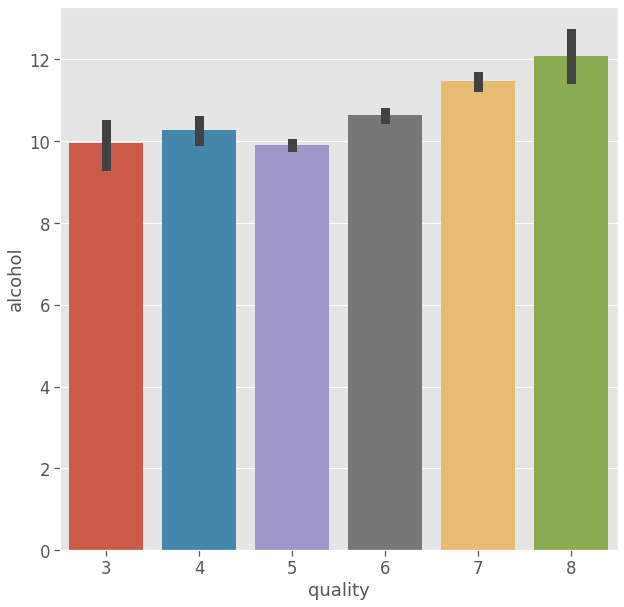

In [10]:
for c in df.columns:
  if c!='quality':
    sns.barplot(x ='quality', y=c, data=df)
    plt.show()

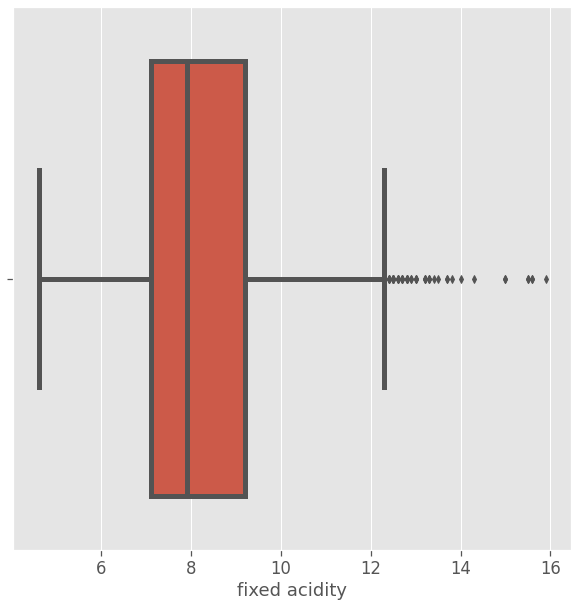

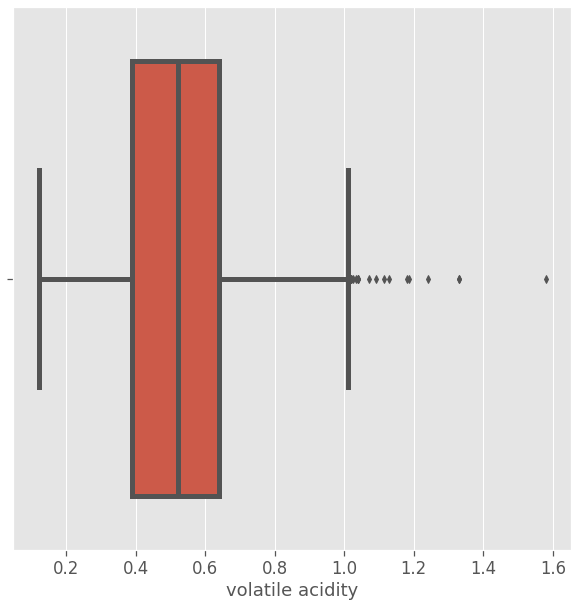

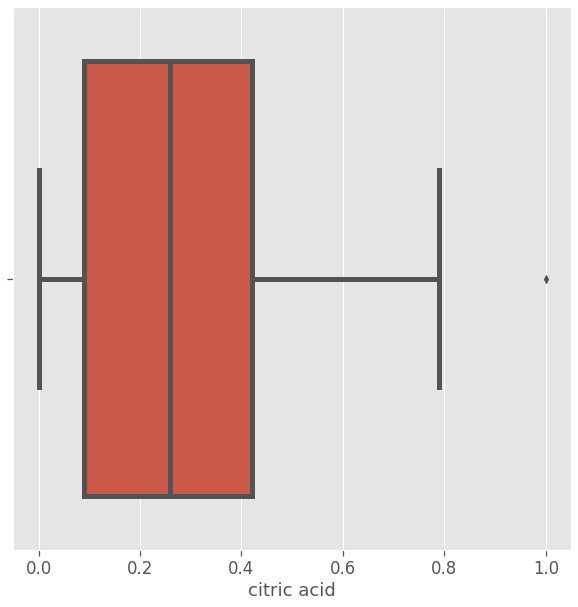

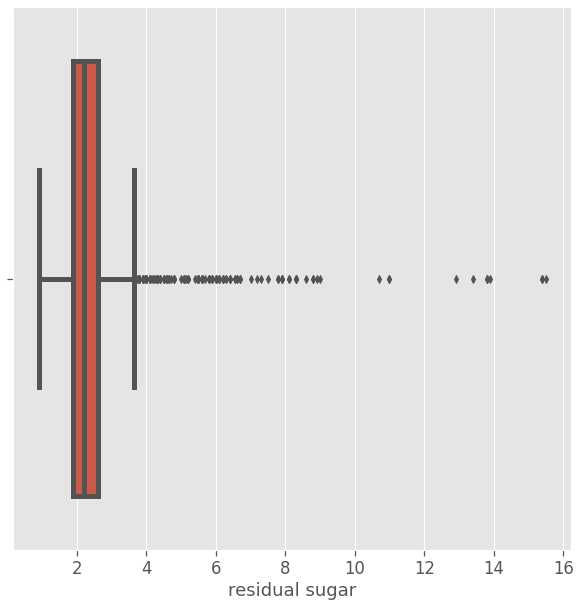

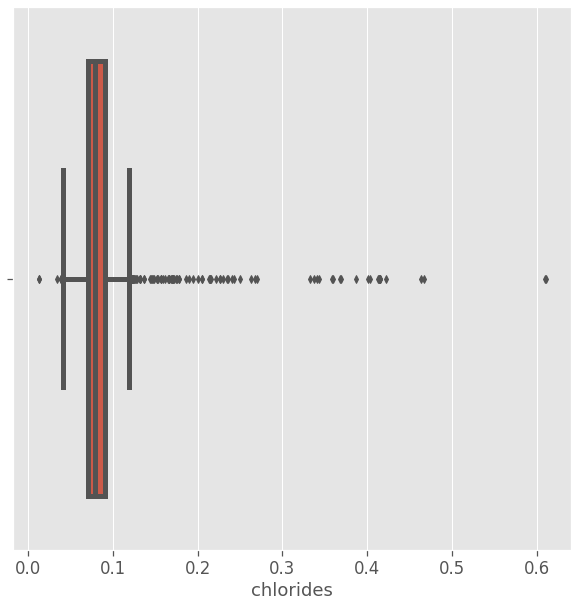

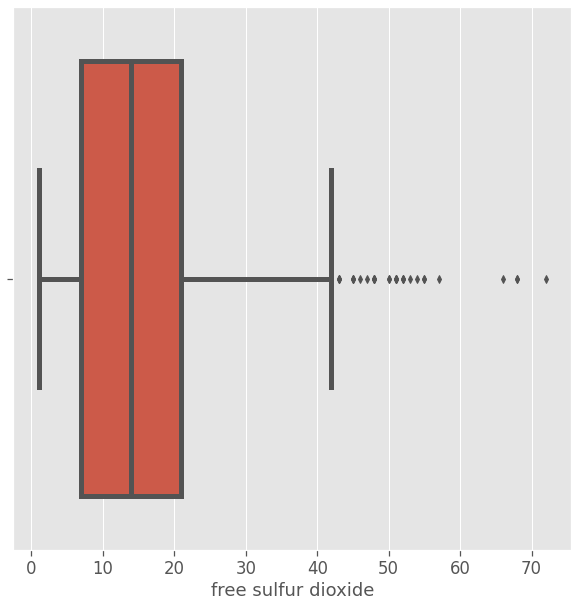

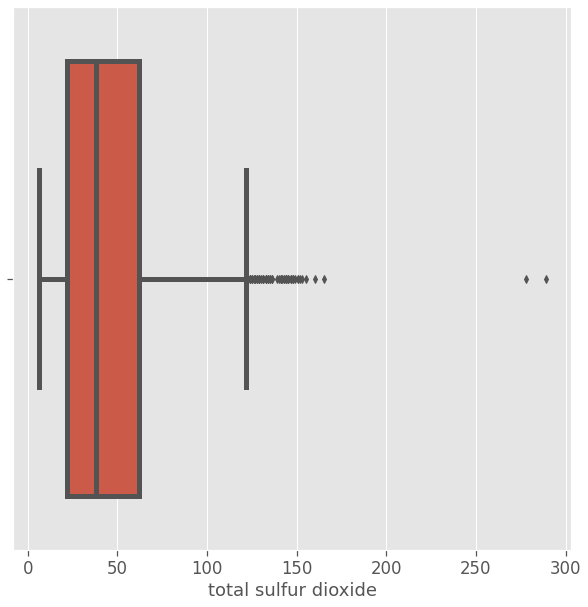

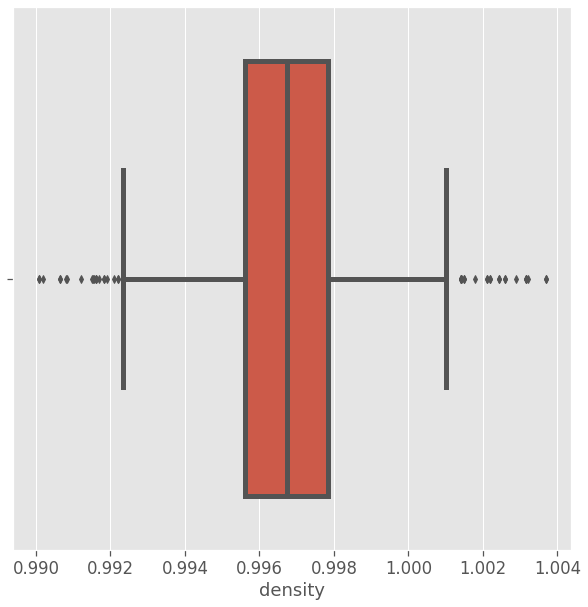

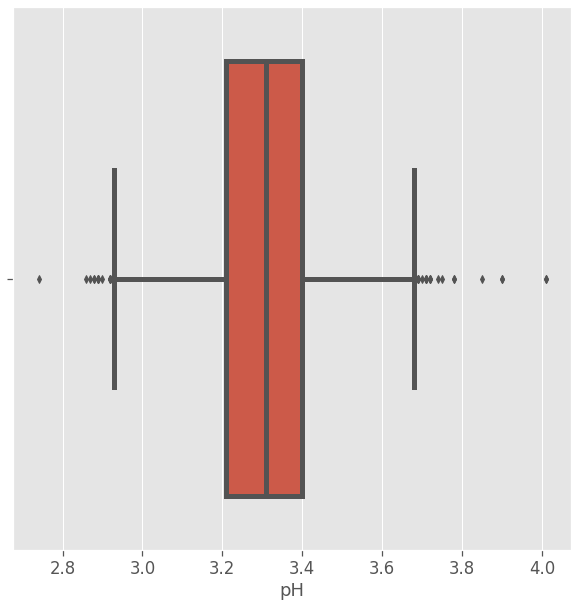

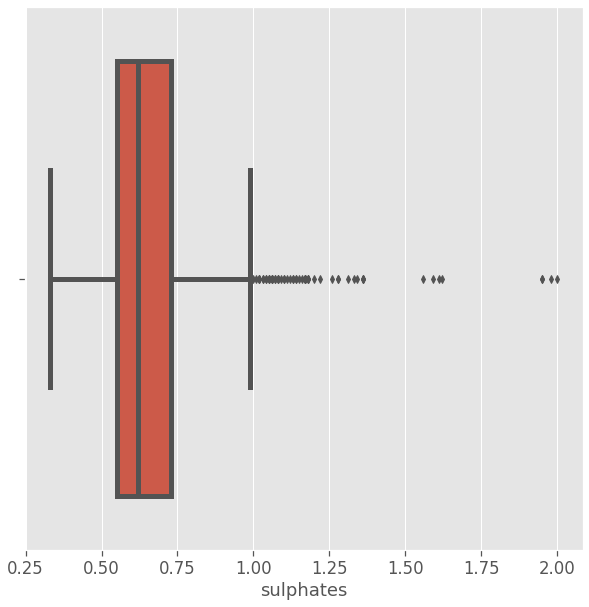

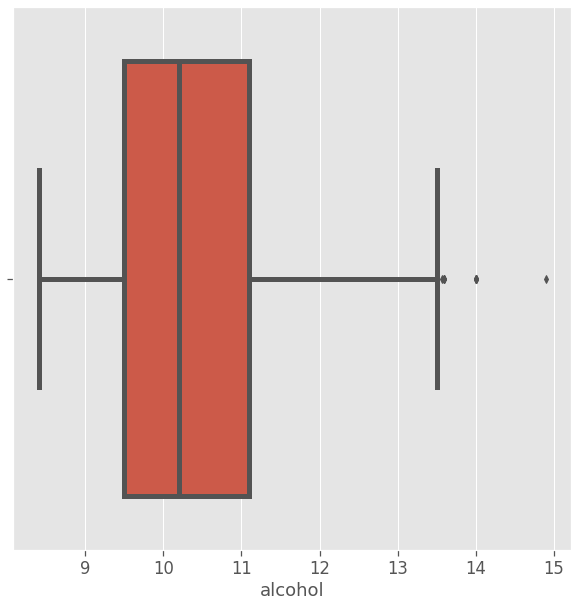

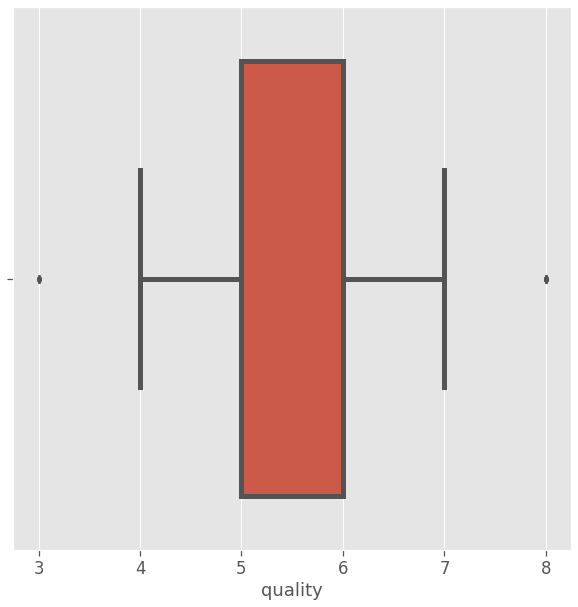

In [11]:
for c in df.columns:
  sns.boxplot(x=df[c], orient="h")
  plt.show()

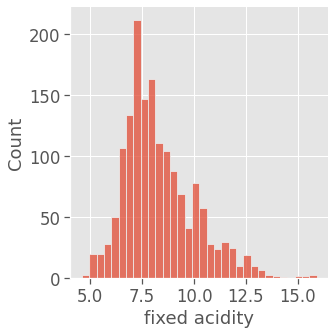

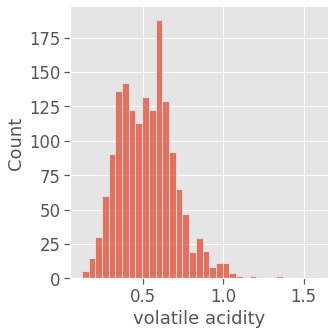

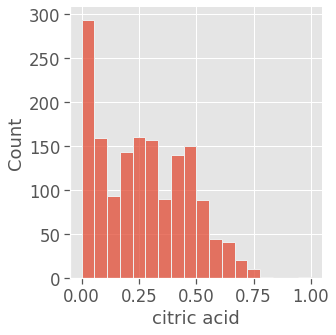

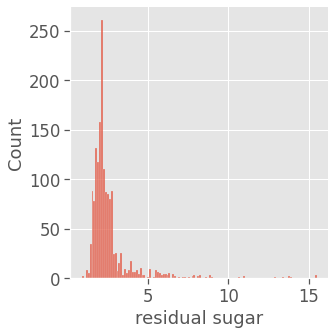

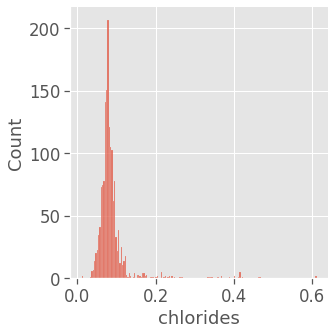

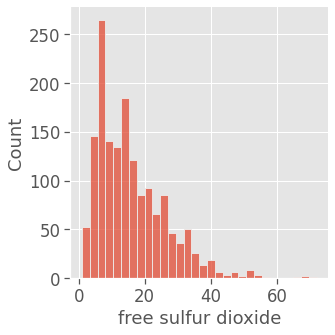

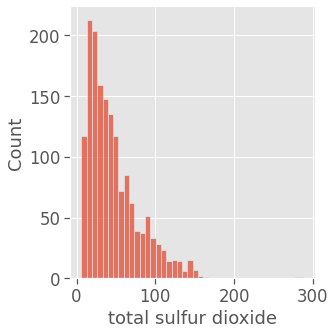

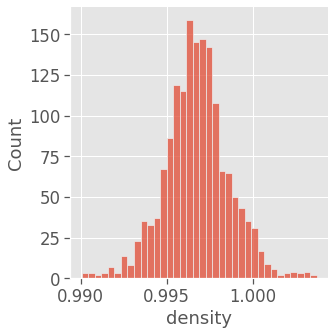

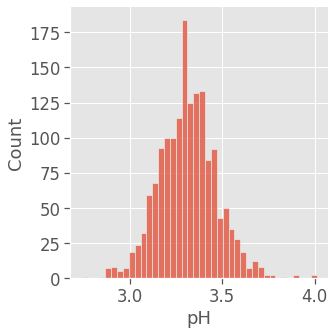

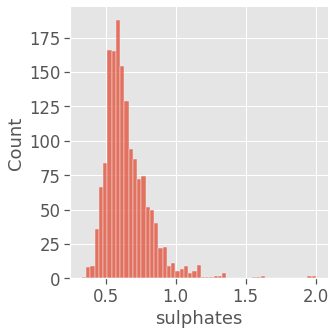

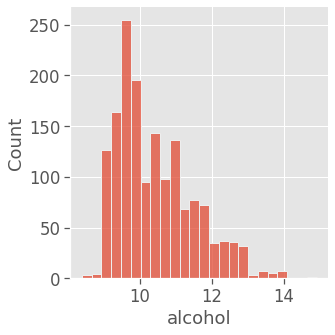

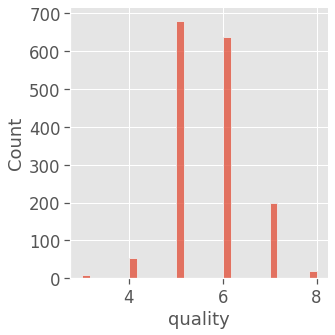

In [12]:
for col in df.columns:
      sns.displot(df[col])
      plt.show()

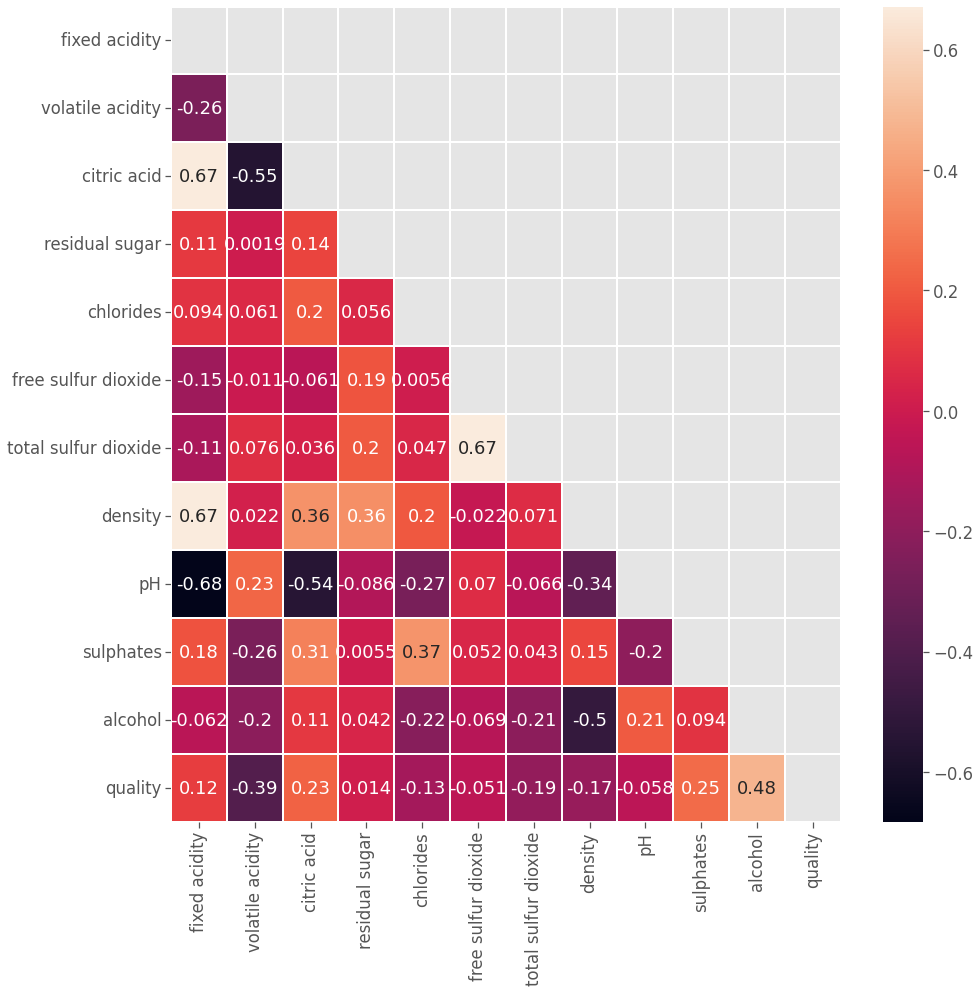

In [13]:
# some features appear to be highly correlated to target feature
plt.figure(figsize=(15, 15))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()

#### Data Preprocessing

Perform preprocessing on dataset to get all scale all feature in proper range and bucketize the target features to make this as a binary classification problem.

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
# bucketize the target features into two classes instead of 6 classes
new_lbls = []
for i in df['quality']:
    if i >= 1 and i < 6.5:
        new_lbls.append('Bad')
    elif i >= 6.5:
        new_lbls.append('Good')

df['new_quality'] = new_lbls

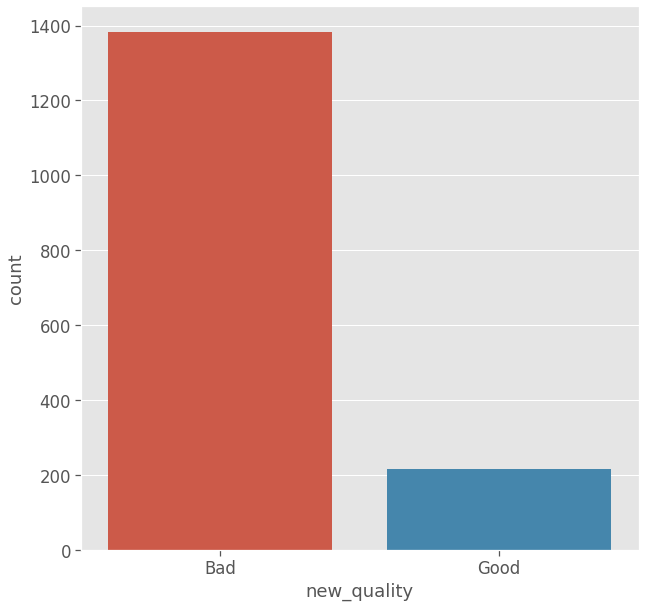

In [44]:
# class imbalance
sns.countplot(x='new_quality', data=df)

In [45]:
# convert target features to numerical
lb_encoder = LabelEncoder()
df['new_quality'] = lb_encoder.fit_transform(df['new_quality'])

In [46]:
X = df.drop(['quality', 'new_quality'], axis = 1)
y = df['new_quality']

In [47]:
# split the dataset into 80%-20% train-test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.20, stratify=y.values, random_state=42)
print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)

Training shape: (1279, 11) (1279,)
Testing shape: (320, 11) (320,)


In [48]:
# scaling data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Modelling

Run different models on the dataset

In [ ]:
!pip install optuna -qq
!pip install shap -qq

Run optuna for hyperparameter tuning

In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import shap

In [51]:
def objective(trial):

    classifier_name = trial.suggest_categorical(
        "classifier", ["LogReg", "SVC", "RandomForest"]
        )

    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        classifier_obj = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=logreg_c, random_state=42)

    elif classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        classifier_obj = SVC(C=svc_c, gamma="auto", random_state=42)
 
    elif classifier_name == "RandomForest":
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators, class_weight='balanced', random_state=42)

    score = cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=3, scoring="f1")
    f1_mean = score.mean()
    return f1_mean

In [52]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=300)

[I 2021-12-08 14:58:45,542] A new study created in memory with name: no-name-fa61931a-5615-43ee-931c-abd5736d0529
[I 2021-12-08 14:58:49,015] Trial 0 finished with value: 0.5011617049920744 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 422, 'rf_max_depth': 12}. Best is trial 0 with value: 0.5011617049920744.
[I 2021-12-08 14:58:49,064] Trial 1 finished with value: 0.42370642324875735 and parameters: {'classifier': 'LogReg', 'logreg_c': 360029.1354651735}. Best is trial 0 with value: 0.5011617049920744.
[I 2021-12-08 14:58:50,121] Trial 2 finished with value: 0.5086536566134437 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 233, 'rf_max_depth': 2}. Best is trial 2 with value: 0.5086536566134437.
[I 2021-12-08 14:58:50,835] Trial 3 finished with value: 0.4759146211051837 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 120, 'rf_max_depth': 13}. Best is trial 2 with value: 0.5086536566134437.
[I 2021-12-08 14:58:51,519] Trial 4 finis

In [53]:
print(f"The best trial is : \n{study.best_trial}")

print(f"The best value is : \n{study.best_value}")

print(f"The best parameters are : \n{study.best_params}")

The best trial is : 
FrozenTrial(number=53, values=[0.5507695249643351], datetime_start=datetime.datetime(2021, 12, 8, 15, 0, 37, 869462), datetime_complete=datetime.datetime(2021, 12, 8, 15, 0, 40, 498932), params={'classifier': 'RandomForest', 'rf_n_estimators': 512, 'rf_max_depth': 5}, distributions={'classifier': CategoricalDistribution(choices=('LogReg', 'SVC', 'RandomForest')), 'rf_n_estimators': IntUniformDistribution(high=1000, low=100, step=1), 'rf_max_depth': IntLogUniformDistribution(high=32, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=53, state=TrialState.COMPLETE, value=None)
The best value is : 
0.5507695249643351
The best parameters are : 
{'classifier': 'RandomForest', 'rf_n_estimators': 512, 'rf_max_depth': 5}


In [54]:
optuna.visualization.plot_optimization_history(study).show()

In [55]:
best_model = RandomForestClassifier(n_estimators=519, max_depth=5, class_weight='balanced', random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=519,
                       random_state=42)

In [56]:
print("Training accuracy:", best_model.score(X_train, y_train))
print("Validation accuracy:", best_model.score(X_test, y_test))

Training accuracy: 0.8764659890539483
Validation accuracy: 0.8875


In [57]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       277
           1       0.56      0.72      0.63        43

    accuracy                           0.89       320
   macro avg       0.76      0.82      0.78       320
weighted avg       0.90      0.89      0.89       320



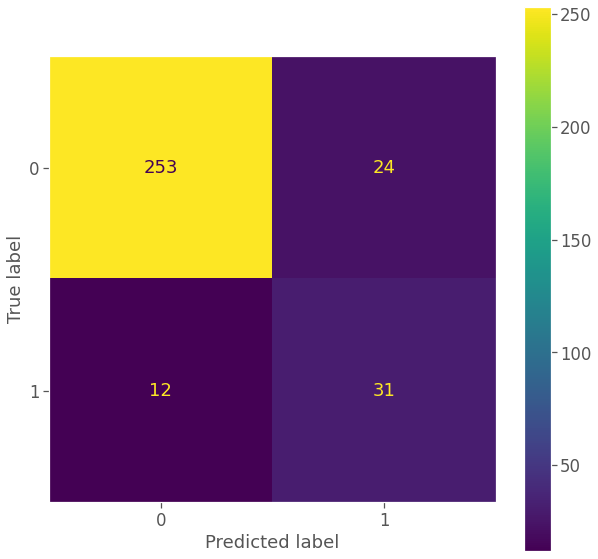

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test), display_labels=best_model.classes_)
plt.grid(False)
plt.show()

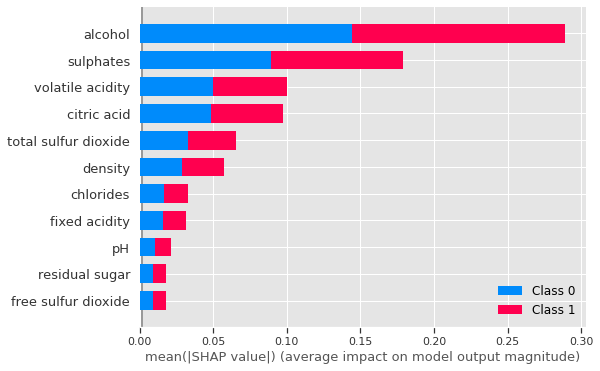

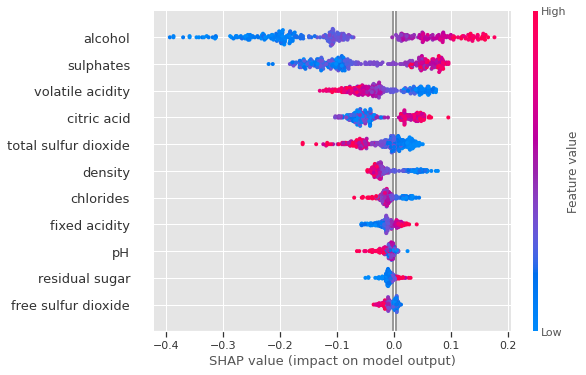

In [59]:
shapvalues = shap.TreeExplainer(best_model).shap_values(X_test)
shap.summary_plot(shapvalues, X_test, X.columns, plot_type="bar") 
plt.show()
shap.summary_plot(shapvalues[1], X_test, X.columns)
plt.show()

In [60]:
import joblib

filename = 'model.joblib'
_ = joblib.dump(best_model, filename, compress=9)
_ = joblib.dump(sc, "scaler.joblib", compress=9)

In [61]:
clf = joblib.load(filename)

In [62]:
samples_df = df.sample(5)
samples_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
654,8.6,0.47,0.47,2.40,0.074,7.0,29.0,0.99790,3.08,0.46,9.5,5,0
502,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7,1
1222,8.1,0.53,0.22,2.20,0.078,33.0,89.0,0.99678,3.26,0.46,9.6,6,0
617,11.5,0.31,0.51,2.20,0.079,14.0,28.0,0.99820,3.03,0.93,9.8,6,0
482,10.6,0.36,0.59,2.20,0.152,6.0,18.0,0.99860,3.04,1.05,9.4,5,0


In [63]:
x_samples = samples_df[X.columns]
x_samples.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
654,8.6,0.47,0.47,2.40,0.074,7.0,29.0,0.99790,3.08,0.46,9.5
502,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0
1222,8.1,0.53,0.22,2.20,0.078,33.0,89.0,0.99678,3.26,0.46,9.6
617,11.5,0.31,0.51,2.20,0.079,14.0,28.0,0.99820,3.03,0.93,9.8
482,10.6,0.36,0.59,2.20,0.152,6.0,18.0,0.99860,3.04,1.05,9.4


In [64]:
x_samples.iloc[0].to_json()

'{"fixed acidity":8.6,"volatile acidity":0.47,"citric acid":0.47,"residual sugar":2.4,"chlorides":0.074,"free sulfur dioxide":7.0,"total sulfur dioxide":29.0,"density":0.9979,"pH":3.08,"sulphates":0.46,"alcohol":9.5}'

In [65]:
scaled_samples = sc.transform(x_samples.values)
list(clf.predict(scaled_samples))

[0, 1, 0, 0, 0]